## Assignments -25/05/2020

## File : cancer_LDA

### Topic : Classification_models-master

#### Submitted by: Anoop V H

##### Version :

##### Date : 27/05/2020

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [2]:
#%% import dataset 
df = pd.read_csv("E:\\1\Assignments\\data.csv")


In [3]:
df.drop(df.columns[[-1, 0]], axis=1, inplace=True)
df['diagnosis'].replace('B',0,inplace=True)
df['diagnosis'].replace('M',1,inplace=True)

In [4]:
#SPLIT INTO TRAIN AND TEST
X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
#STANDRIZE DATA
scaler = StandardScaler()

In [6]:
# Fit on training set only.
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
std_train = scaler.transform(X_train)
std_test = scaler.transform(X_test)

In [8]:
#PCA TO CAPTURE 95% of VARIANCE IN DATA
pca = PCA(.95)

In [9]:
pca.fit(std_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [10]:
X_train = pca.transform(std_train)
X_test = pca.transform(std_test)

In [11]:
#VISUALIZING DATA USING FIRST 2 PCA
pri_Df = pd.DataFrame(data = -1*X_train[:,0:2], columns = ['principal component 1', 'principal component 2'])
PCALab=pd.DataFrame(data = y_train, columns = ['Labels'])
finalDf= pd.concat([pri_Df, PCALab], axis = 1)

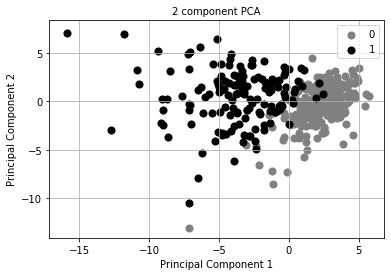

In [12]:
tar = [0, 1]
colors = ['gray','black']
figure = plt.figure()
a = figure.add_subplot(1,1,1)
a.set_xlabel('Principal Component 1', fontsize = 10)
a.set_ylabel('Principal Component 2', fontsize = 10)
a.set_title('2 component PCA', fontsize = 10)
for t, col in zip(tar,colors):
    x = finalDf['Labels'] == t
    a.scatter(finalDf.loc[x, 'principal component 1'],finalDf.loc[x, 'principal component 2'],c = col,s = 50)
a.legend(tar)
a.grid(True)
plt.show()

In [13]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
score = lda.score(X_test, y_test)
pred = lda.predict(X_test)
prob=lda.predict_proba(X_test)
auc = roc_auc_score(y_test, pred)
# test error
acc = metrics.accuracy_score(y_test, pred)
acc
pre=metrics.precision_score(y_test, pred)
pre
f1=metrics.f1_score(y_test, pred)
f1
recall=metrics.recall_score(y_test, pred)
pre,recall,f1,acc

(1.0, 0.873015873015873, 0.9322033898305084, 0.9532163742690059)

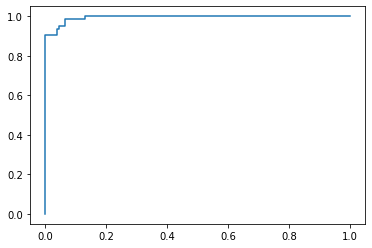

In [14]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, prob[:,1])
plt.plot(fpr, tpr)
plt.show()

In [15]:
#CALCULATE CONFUSION MATRIX
conf_mat = confusion_matrix(y_test, pred)
conf_mat

array([[108,   0],
       [  8,  55]], dtype=int64)

In [16]:
TP=conf_mat[0,0]
TN=conf_mat[1,1]
FP=conf_mat[0,1]
FN=conf_mat[1,0]

pre_a=(TP/(TP+FP))
recall_a=(TP/(TP+FN))
f1_a=(2*TP/(2*TP+FN+FP))
acc_a=((TP+TN)/np.sum(conf_mat))

conf_mat,pre_a,recall_a,f1_a,acc_a

(array([[108,   0],
        [  8,  55]], dtype=int64),
 1.0,
 0.9310344827586207,
 0.9642857142857143,
 0.9532163742690059)